                                             House Rental Models
                                             Bhuvnesh Kochhar

## Reading Data
We first start by reading the data which was obtained from kaggle.

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

The aim of this analysis is to build models to predict rental house prices using other information provided such as Area Type, Size etc.

In [1]:
import pandas as pd

housing_data=pd.read_csv('House_Rent_Dataset.csv')

housing_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [2]:
housing_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


## Feature Selection

For this analysis, variables "Tenant Preferred", "Point of Contact" and "Posted on" will not be used in our predictive models. Also, the variable "floor" will be converted into two separate numerical variables, "On Floor" and "Total Floor" which represent the floor the rental property is located on and the total number of floors in the property respectively.

## Cleaning/Transforming Data

In [4]:
on_floor_lst=[]
total_floor_lst=[]

for i in housing_data.Floor:
    lst=i.split("out of")
    #print(lst)
    on_floor_lst.append(lst[0])
    try:
        total_floor_lst.append(lst[1])
    except:
        total_floor_lst.append("Not Provided")

In [5]:
# Stripping Spaces 
on_floor_lst = [x.strip(' ') for x in on_floor_lst]
total_floor_lst = [x.strip(' ') for x in total_floor_lst]

In [6]:
new_lst_on=[]

for i in on_floor_lst:
    #Ground Flood
    if i.startswith('G'):
        new_lst_on.append('1')
    #Upper Basement 
    elif i.startswith('U'):
        new_lst_on.append("Not Provided")
    #Lower Basement 
    elif i.startswith('L'):
        new_lst_on.append("Not Provided")

    else:
        new_lst_on.append(i)   

In [7]:
housing_data['On Floor']=new_lst_on
housing_data['Total Floor']=total_floor_lst
housing_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,On Floor,Total Floor
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [8]:
# Drop the rows with Not provided data.

housing_data=housing_data.drop(housing_data[housing_data["Total Floor"] == "Not Provided"].index)
housing_data=housing_data.drop(housing_data[housing_data["On Floor"] == "Not Provided"].index)

In [9]:
# Convert new variables to int

housing_data['Total Floor']=housing_data['Total Floor'].astype(int)
housing_data['On Floor']=housing_data['On Floor'].astype(int)

## Visualization

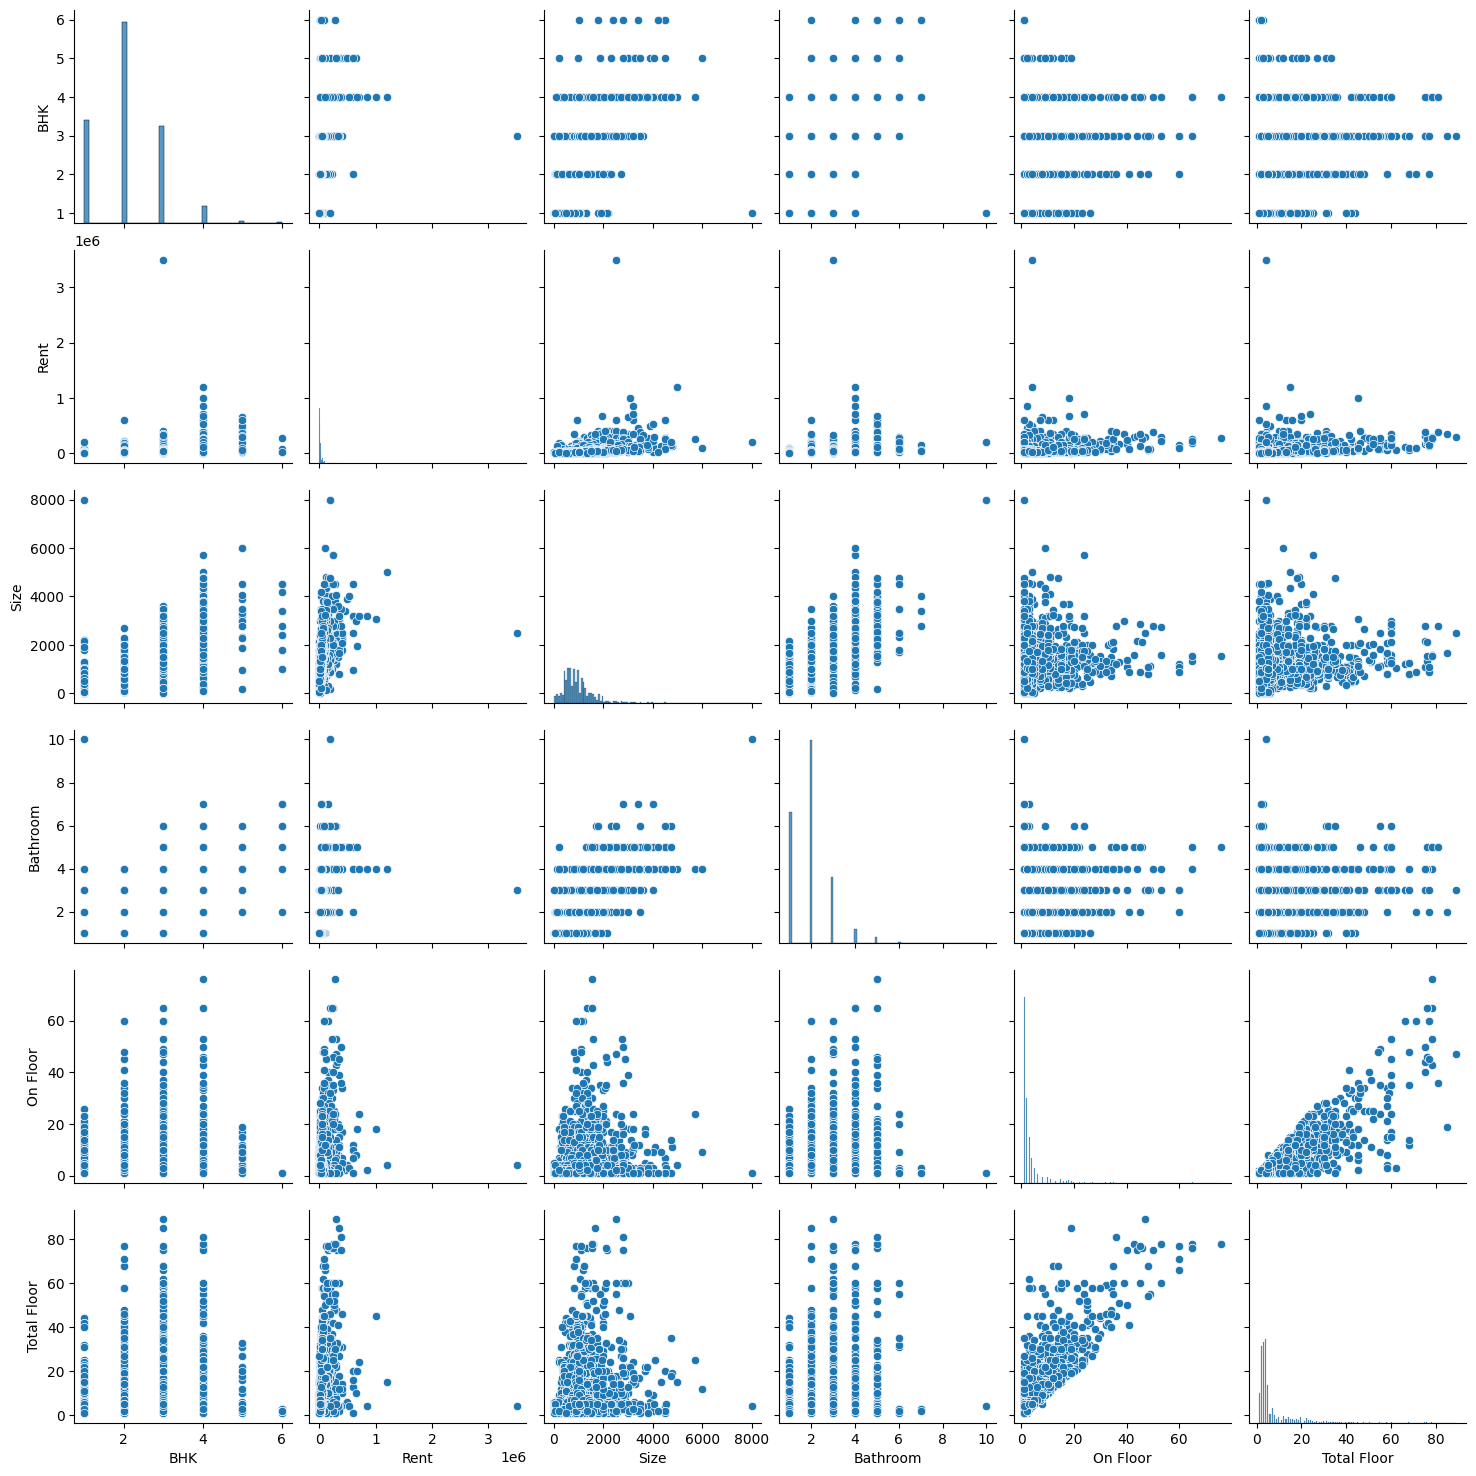

In [10]:
import seaborn as sns
sns.pairplot(housing_data)


From visual inspection of the pair plot above we can see that we have a outlier rent value . Including this value could have adverse effects on our models. We will remove this observations from our dataframe.

In [11]:

housing_data=housing_data.drop(housing_data[housing_data["Rent"] > 1200000 ].index)

In [12]:
housing_data.describe()

,BHK,Rent,Size,Bathroom,On Floor,Total Floor
count,4707.000000,4.707000e+03,4707.000000,4707.000000,4707.000000,4707.000000
mean,2.083280,3.409134e+04,965.987465,1.964733,3.669004,6.954748
std,0.831968,5.945767e+04,627.958121,0.883352,5.677558,9.465119
min,1.000000,1.200000e+03,10.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,1.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,2.000000,4.000000
75%,3.000000,3.225000e+04,1200.000000,2.000000,3.000000,6.000000
max,6.000000,1.200000e+06,8000.000000,10.000000,76.000000,89.000000


## Categorical Variable Transformation

For all the models trained for this dataset, we will feed them only numerical data. Thus it is important to convert the categorical variables inside the data-set.


In [13]:
cat_lst= ['Area Type','Area Locality','City','Furnishing Status']

for i in cat_lst:
    housing_data[i]=housing_data[i].astype('category')

housing_data.dtypes

Posted On              object
BHK                     int64
Rent                    int64
Size                    int64
Floor                  object
Area Type            category
Area Locality        category
City                 category
Furnishing Status    category
Tenant Preferred       object
Bathroom                int64
Point of Contact       object
On Floor                int32
Total Floor             int32
dtype: object

## Creating new dataframe for modelling. 

In [14]:
new_housing=pd.DataFrame()

int_lst=['Rent','Size','Bathroom','BHK','On Floor','Total Floor']

for i in int_lst:
    new_housing[i]=housing_data[i]


for i in cat_lst:
    new_housing[i]=housing_data[i].cat.codes+1



In [15]:
new_housing.head()

,Rent,Size,Bathroom,BHK,On Floor,Total Floor,Area Type,Area Locality,City,Furnishing Status
0,10000,1100,2,2,1,2,3,220,5,3
1,20000,800,1,2,1,3,3,1516,5,2
2,17000,1000,1,2,1,3,3,1748,5,2
3,10000,800,1,2,1,2,3,523,5,3
4,7500,850,1,2,1,2,2,1878,5,3


As we can see above all our variables in our new dataframe are numerical and ready for modelling.

In [16]:
new_housing.describe()

,Rent,Size,Bathroom,BHK,On Floor,Total Floor,Area Type,Area Locality,City,Furnishing Status
count,4.707000e+03,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000
mean,3.409134e+04,965.987465,1.964733,2.083280,3.669004,6.954748,2.517527,1085.240493,3.450393,2.238793
std,5.945767e+04,627.958121,0.883352,0.831968,5.677558,9.465119,0.500595,628.747611,1.785880,0.684290
min,1.200000e+03,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000e+04,550.000000,1.000000,2.000000,1.000000,2.000000,2.000000,549.500000,2.000000,2.000000
50%,1.600000e+04,850.000000,2.000000,2.000000,2.000000,4.000000,3.000000,1089.000000,3.000000,2.000000
75%,3.225000e+04,1200.000000,2.000000,3.000000,3.000000,6.000000,3.000000,1622.000000,5.000000,3.000000
max,1.200000e+06,8000.000000,10.000000,6.000000,76.000000,89.000000,3.000000,2219.000000,6.000000,3.000000


In [18]:
sns.pairplot(new_housing)

In [19]:
import numpy as np

We also want to log transform certain variables so that all variables are on a similar scale. 

In [20]:

log_lst=['Rent','Size','Area Locality','On Floor','Total Floor']

for i in log_lst:
    new_housing[i]=np.log(new_housing[i])


In [21]:
new_housing.head()

,Rent,Size,Bathroom,BHK,On Floor,Total Floor,Area Type,Area Locality,City,Furnishing Status
0,9.210340,7.003065,2,2,0.0,0.693147,3,5.393628,5,3
1,9.903488,6.684612,1,2,0.0,1.098612,3,7.323831,5,2
2,9.740969,6.907755,1,2,0.0,1.098612,3,7.466228,5,2
3,9.210340,6.684612,1,2,0.0,0.693147,3,6.259582,5,3
4,8.922658,6.745236,1,2,0.0,0.693147,2,7.537963,5,3


## Train-Test Split

In [22]:
from sklearn import model_selection

vals=new_housing.values

training_dataset, test_dataset = model_selection.train_test_split(vals, train_size=0.80,random_state=40)
print("The length of test data is:",len(test_dataset),"\n""The length of training data is:",len(training_dataset))

The length of test data is: 942 
The length of training data is: 3765



For all of our predictive models, we are using all other variables in our dataset such as furnishing status, city, area locality etc to predict rental house prices.

In [23]:
trainX=training_dataset[:,1:] ## all vals exept for rent

trainy=training_dataset[:,0] ## rent values


# data check
print("length of training data, X,y")
print(len(trainX),len(trainy))

testX=test_dataset[:,1:]

testy=test_dataset[:,0]


# data check
print("\nlength of testing data, X,y")
print(len(testX),len(testy))

length of training data, X,y
3765 3765

length of testing data, X,y
942 942


## Modelling

In this analysis we will use Grid Search and 3-fold cross-validation to find the best possible parameters for our models and use the Root Mean Square Error (RMSE) as well as the testing and training accuracy for evaluation of the models.


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

hyper_grid_lin={'fit_intercept': [True,False],'positive': [True,False]}


grid_lin=GridSearchCV(LinearRegression(),hyper_grid_lin,cv=3) 
grid_lin.fit(trainX,trainy)

print("\nThe best parameters after grid search are :",grid_lin.best_params_)

print("\nThe test accuracy of the best Linear model is :",grid_lin.score(testX,testy))
print("\nThe train accuracy of the best Linear model is :",grid_lin.score(trainX,trainy))


rms_linear = mean_squared_error(testy, grid_lin.predict(testX), squared=False)
print("\nThe RMSE of the best Linear Reg model is :",rms_linear)


The best parameters after grid search are : {'fit_intercept': True, 'positive': False}

The test accuracy of the best Linear model is : 0.7122469495778307

The train accuracy of the best Linear model is : 0.7055141146978471

The RMSE of the best Linear Reg model is : 0.4955930089872103


### SGD Regressor

In [26]:
from sklearn.linear_model import SGDRegressor

hyperSGD_grid={'loss': ['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive']
             ,'penalty': ['l2', 'l1', 'elasticnet'] ,'learning_rate': ['constant', 'optimal', 'invscaling'
             , 'adaptive']  }

# random state used to generate reproducible results 

grid_SGD=GridSearchCV(SGDRegressor(random_state=40,max_iter=5000),hyperSGD_grid,cv=3)
grid_SGD.fit(trainX,trainy)

print("\nThe best SGD parameters after grid search are :",grid_SGD.best_params_)
print("\nThe test accuracy of the best SGD model is :",grid_SGD.score(testX,testy))
print("\nThe train accuracy of the best SGD model is :",grid_SGD.score(trainX,trainy))

rms_SGD = mean_squared_error(testy, grid_SGD.predict(testX), squared=False)

print("\nThe RMSE of the best SGD Reg model is :",rms_SGD)


The best SGD parameters after grid search are : {'learning_rate': 'adaptive', 'loss': 'squared_error', 'penalty': 'l1'}

The test accuracy of the best SGD model is : 0.7122358670946518

The train accuracy of the best SGD model is : 0.7055011971213756

The RMSE of the best SGD Reg model is : 0.4956025524973403


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor
hyperRF_grid={'n_estimators': [500,1000,1500,2000] 
             
             ,'min_samples_split': [2,3,4,5,6],'min_samples_leaf': [2,3,4,5,6] 
             ,'criterion': ['squared_error','absolute_error','poisson']}


grid_RF=GridSearchCV(RandomForestRegressor(random_state=40),hyperRF_grid,cv=3)
grid_RF.fit(trainX,trainy)

grid_RF.fit(trainX,trainy)

print("\nThe test accuracy of RF model is :",grid_RF.score(testX,testy))
print("\nThe train accuracy of RF model is :",grid_RF.score(trainX,trainy))


print("\nThe best RF parameters after grid search are :",grid_RF.best_params_)


rms_RF = mean_squared_error(testy, grid_RF.predict(testX), squared=False)

print("\nThe RMSE of RF regressor model is :",rms_RF)


The test accuracy of RF model is : 0.8443447703277233

The train accuracy of RF model is : 0.9260488402686374

The best RF parameters after grid search are : {'criterion': 'squared_error', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1500}

The RMSE of RF regressor model is : 0.3644996046722545


### Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
hyperBag_grid={'max_samples': [250,500,1000,2000] 
             ,'n_estimators': [250,500,1000] 
             ,'bootstrap': [True,False]}

grid_Bag=GridSearchCV(BaggingRegressor(),hyperBag_grid,cv=3)
grid_Bag.fit(trainX,trainy)

grid_Bag.fit(trainX,trainy)

print("\nThe test accuracy of BAG SVR model is :",grid_Bag.score(testX,testy))
print("\nThe train accuracy of Bag SVR model is :",grid_Bag.score(trainX,trainy))


print("\nThe best BAG regressor parameters after grid search are :",grid_Bag.best_params_)


rms_Grid_Bag = mean_squared_error(testy, grid_Bag.predict(testX), squared=False)

print("\nThe RMSE of BAG regressor model is :",rms_Grid_Bag)


The test accuracy of BAG SVR model is : 0.8398858767226705

The train accuracy of Bag SVR model is : 0.8927684402660492

The best BAG regressor parameters after grid search are : {'bootstrap': True, 'max_samples': 1000, 'n_estimators': 1000}

The RMSE of BAG regressor model is : 0.3696834633330596


### Support Vector Regression

In [29]:
from sklearn.svm import SVR

hyper_grid_SVR={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree': [2,3,4,5],'C': [0.1,1,10,100]}


grid_SVR=GridSearchCV(SVR(),hyper_grid_SVR,cv=3)
grid_SVR.fit(trainX,trainy)

print("\nThe best parameters after grid search are :",grid_SVR.best_params_)
print("\nThe test accuracy of the best SVR model is :",grid_SVR.score(testX,testy))
print("\nThe train accuracy of the best SVR model is :",grid_SVR.score(trainX,trainy))


rms_2 = mean_squared_error(testy, grid_SVR.predict(testX), squared=False)
print("\nThe RMSE of the best SVR Reg model is :",rms_2)



The best parameters after grid search are : {'C': 100, 'degree': 2, 'kernel': 'rbf'}

The test accuracy of the best SVR model is : 0.8416062574250586

The train accuracy of the best SVR model is : 0.8292610782843154

The RMSE of the best SVR Reg model is : 0.36769202771416926


### Voting Model

Generally, we can combine the performance of multiple models using a voting classifier or regressor and achieve even better results. For this analysis, the 3 most accurate models, bagging regression, random forest and support vector regression were combined to form a voting regressor.  


In [30]:
from sklearn.ensemble import VotingRegressor

voting_clf = VotingRegressor(

estimators=[('Bag', grid_Bag),('RF',grid_RF),('SVR',grid_SVR)])
voting_clf.fit(trainX, trainy)

print("\nThe test accuracy of the Voting Reg model is :",voting_clf.score(testX, testy))
print("\nThe train accuracy of the Voting Reg model is :",voting_clf.score(trainX, trainy))
rms_4 = mean_squared_error(testy, voting_clf.predict(testX), squared=False)

print("\nThe RMSE of Voting Reg model is :",rms_4)


The test accuracy of the Voting Reg model is : 0.8504051702743141

The train accuracy of the Voting Reg model is : 0.8911592013308602

The RMSE of Voting Reg model is : 0.3573333041857352


In fact, the voting regressor does improve performance after combining the 3 most accurate models. As we can see above the voting regressor achieves the highest test accuracy of 85% as well as the lowest RMSE of 0.36. 